# <center><font face=' bold'> Salary Prediction</font></center>

<b>Problem on Hand:</b>Given a data set which captures gross salary from

July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014 

*Predict* the Salaries for Employees in Blatimore
</b>


## Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <font face='italic'> Importing The Dataset</font>

In [2]:
salary_org = pd.read_csv("Salaries.csv")

salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


## <font face='italic'> Data Cleaning and Preparation</font>

In [3]:
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


 - There are 18981 rows in the data set
 - There are 7 columns in the data set provided
 - All the columns are of type Object.

 Its always a good practice to work on copy of data set instead of the Original Data set itself. Hence Creating a _copy of the data set_ .

In [4]:
# Create a copy of data set

salary_copy = salary_org.copy()

In [5]:
salary_copy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [6]:
# Remove leading and trailing edges
salary_copy.columns = salary_copy.columns.str.strip()

# print coloumns after stripping spaces
print("After Removing leading and trailing spaces ", salary_copy.columns)


After Removing leading and trailing spaces  Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


The first and formost step before we jump into Analysis is Treating Null Values.
So let us check Null values

In [7]:
salary_copy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

Dropping the rows having Null _Hire Date_

In [8]:
salary_copy=salary_copy.dropna(subset=['HireDate'])

In [9]:
salary_copy.isnull().sum()
#So,there is no null value in HireDate

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

Gross Pay is dependent on Annual salary. 
So these two are interrelated and only one of this can be used as dependent variable.
As we have null values in GrossPay , dropping Grosspay

In [10]:
salary_copy=salary_copy.drop('GrossPay', axis=1)

In [11]:
salary_copy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

So,Now all the null values are removed.

- Now let us check value counts for all the columns

In [12]:
salary_copy.AgencyID.value_counts()    # Value_counts for AgencyId

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies in Blatimore. As per general Understanding AgencyID represents an Agency, so we should have same number of Agencies as well. Lets check the same

In [13]:
salary_copy.Agency.value_counts()        # Value_counts for Agency

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

Against general expectations, A single Agency seems to have different Agency ID's which might be given based on Job Role and Agency. Let's verify the Same

In [14]:
salary_copy.JobTitle.value_counts()       # Value_counts for JobTitle

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [15]:
salary_copy.HireDate.value_counts()        # Value_counts on HireDate

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

- More number of people are selected on 05/21/2014
- Date is of format MM/DD/YYYY

In [16]:
salary_copy.AnnualSalary.value_counts()     # Value_counts on AnnualSalary

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$58227.00       1
$41704.00       1
$44700.00       1
$43000.00       1
$900.00         1
Name: AnnualSalary, Length: 1590, dtype: int64

-  Annaul Salary has a dollar attached to it we will have to remove it and convert it ingto integer format

In [17]:
salary_copy['AnnualSalary'] = salary_copy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [18]:
salary_copy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

##### Now, lets also break the Date into year, month and day

In [19]:
salary_copy['HireDay'] = salary_copy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_copy['HireMonth'] = salary_copy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_copy['HireYear'] = salary_copy['HireDate'].apply(lambda x : (int)(str(x[6:])))

In [20]:
salary_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


Trimming all categorical columns to make sure there are no leading and trailing spacces and no double space between Words

In [21]:
# Trim spaces
salary_copy['JobTitle'] = salary_copy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_copy['AgencyID'] = salary_copy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_copy['Agency'] = salary_copy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

It can also be seen that some of the job titles are in Upper case. so with Lowe and with mix of both which might effect analysis, so converting them to  uppercase and also converting  Agency and AgencyID

In [22]:
# Converting to upper case
salary_copy['JobTitle'] = salary_copy['JobTitle'].apply(lambda x : str(x).upper())
salary_copy['AgencyID'] = salary_copy['AgencyID'].apply(lambda x : str(x).upper())
salary_copy['Agency'] = salary_copy['Agency'].apply(lambda x : str(x).upper())

- The last thing left in Data Preparation is Outlier Treatment. So lerts create _Box plot_ for Annual Salary and check for Outliers 

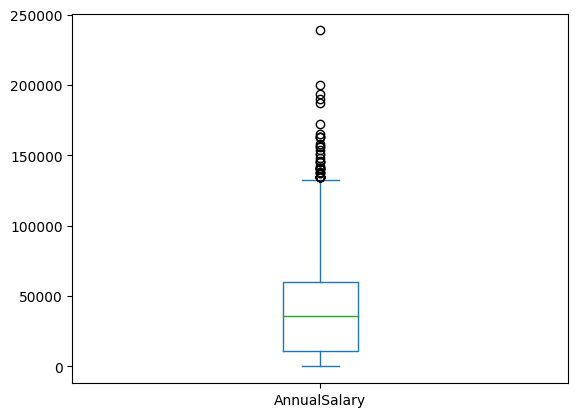

In [23]:
salary_copy.AnnualSalary.plot.box()
plt.show()

-  There are few Salaries which are way far from other Salaries.
-  They might effect the prediction. So we have to eliminate them


- let us check summary Statistics as well for AnnualSalary

In [24]:
salary_copy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

As can be seen The max value way more than mean , median .

Let's delete rows whose annual salary> 1500000 according to box plot

In [25]:
salary_copy = salary_copy[salary_copy['AnnualSalary']<150000]
salary_copy.shape

(18895, 9)

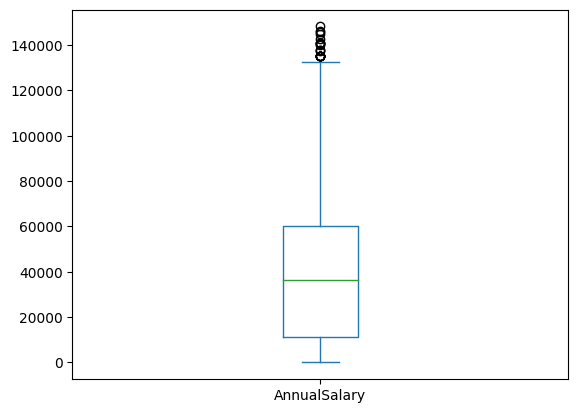

In [26]:
salary_copy.AnnualSalary.plot.box()
plt.show()

All the data points above the 75% line are very close to each other so leaving it as it is.

- Now that we are done with Data preparation lets move to the next step.

## <font face='italic'> Exploratory Data Analysis </font>

 We will first check the distribution of of Annual Salary by creating a distplot

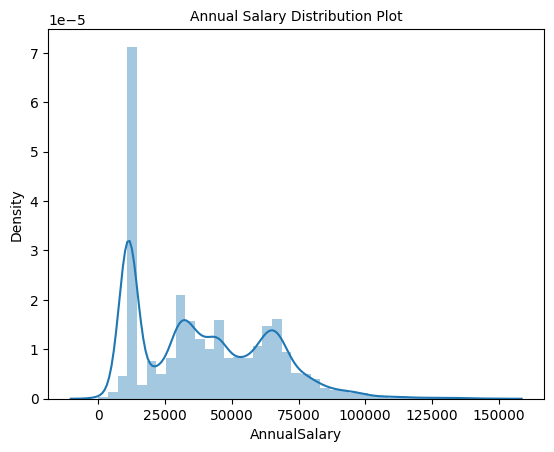

In [27]:
# Check distribution of Target Variable

sns.distplot(salary_copy.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=10)
plt.show()

 - The data is distributed very randomly and there seems to be not many peopel with salary more than 100000

Let us check jobs for which people are being hired the most. For this we will be creating a barplot

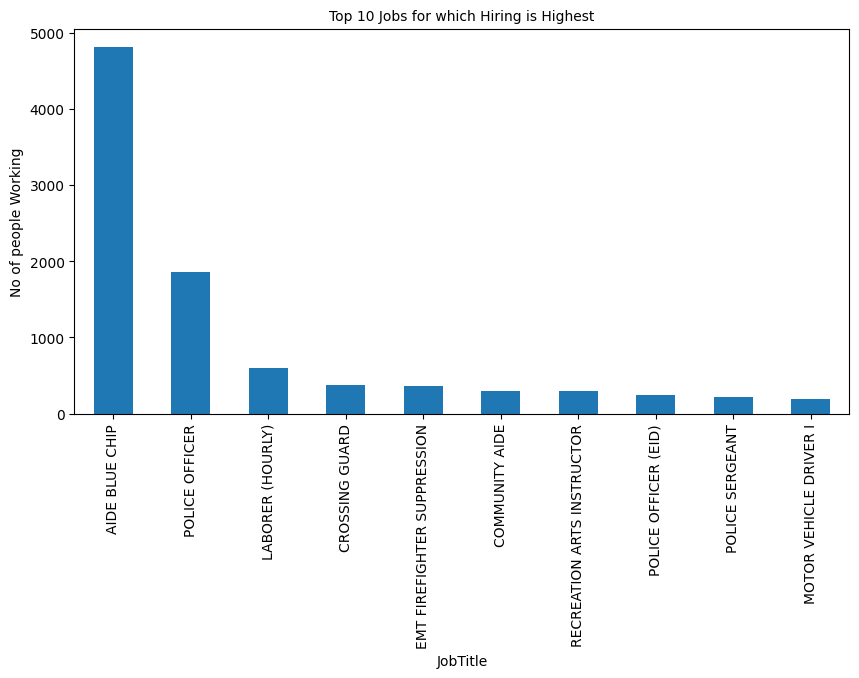

In [28]:
#Top 10 Jobs that based on hirings

plt.figure(figsize=(10,5))
salary_copy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=10)
plt.show()

- The above plot clearly shows more number of People are working as AIDE BLUE CHIP which  has over double the workers working as POLICE OFFICER which is second Highest
- All the remaining JobTitles have less than 1000 Workers 

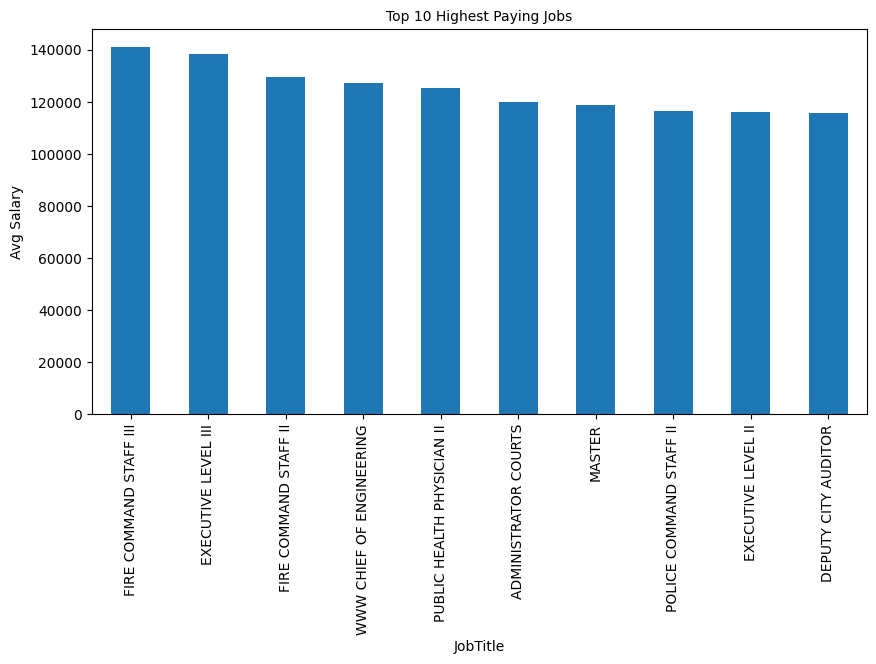

In [29]:
#Top 10 Jobs that fetche highest Salary

plt.figure(figsize=(10,5))
salary_copy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=10)
plt.show()

- The above plot clearly shows top 10 Jobs which fetch the highest Salary.

In [30]:
# Find mean Slary
mean_sal = salary_copy.AnnualSalary.mean()

# Number of Jobs paying more than mean salary
good_pay_jobs = salary_copy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

798

- Out of 1073 Jobs 798 Jobs pay more than total average Salary

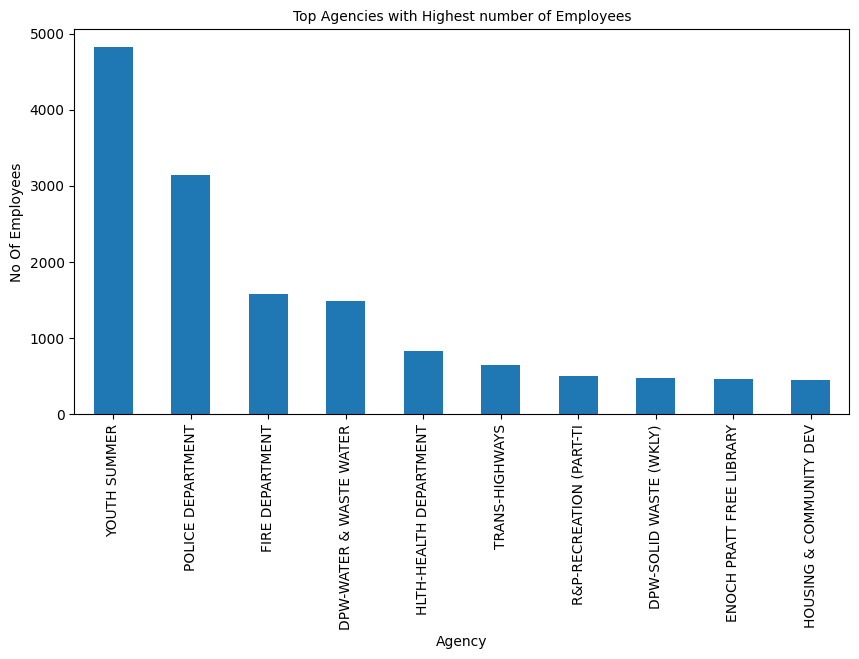

In [31]:
#Top 10 Agencies that has highest number of employees

plt.figure(figsize=(10,5))
salary_copy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=10)
plt.show()

 - The Youth Summer has maximum number of employees followed by Police Department
 - Fire Department and DPW - Water & Waste Water has almost same number of employees

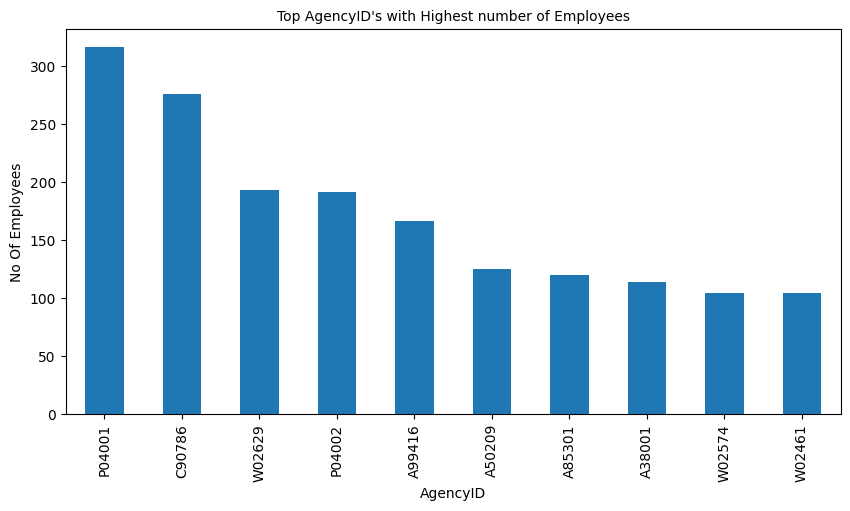

In [32]:
#Top 10 Jobs that has highest number of employees

plt.figure(figsize=(10,5))
salary_copy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=10)
plt.show()

- The P04001 has maximum number of employees followed by C90786

Let us check people hired in which year have lowest Salaries. This is to check if as the Hire Year increases the Salary decreases. Because, Salry is high for people who have high experience

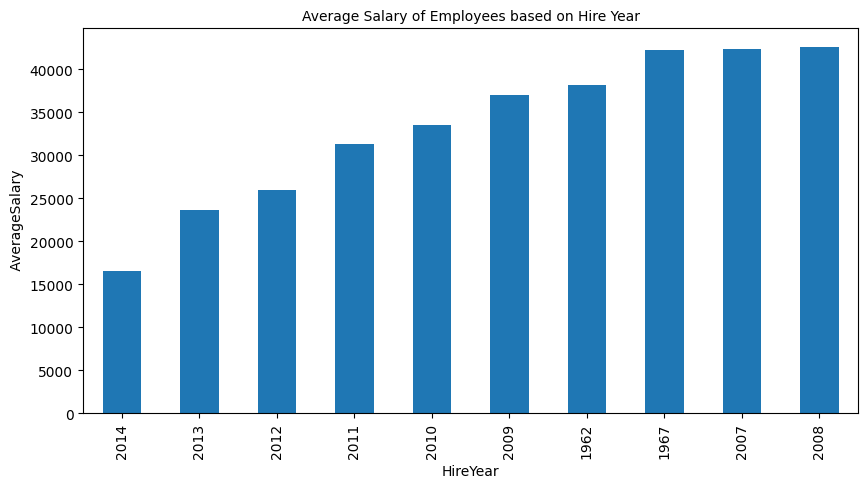

In [33]:
# Salary vs Hire Year

plt.figure(figsize=(10,5))
salary_copy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel(' AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=10)
plt.show()

 - The trend above Suggests that the Salary of the employees increases with experience in the company. So now lets calculate experience in days with Agency.

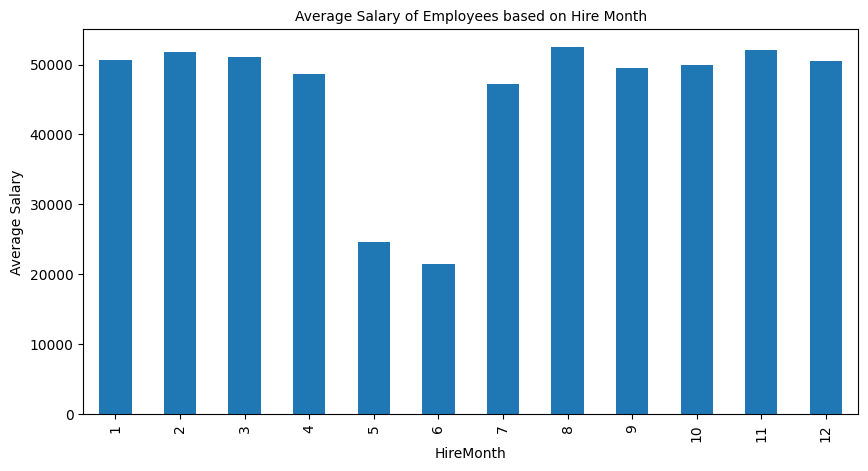

In [34]:
# Checking if Month hired has any such effect

plt.figure(figsize=(10,5))
salary_copy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=10)
plt.show()

- Except in Months 5 and 6 the distribution is same throughout.
- This might be because big agencies donot hire during that time

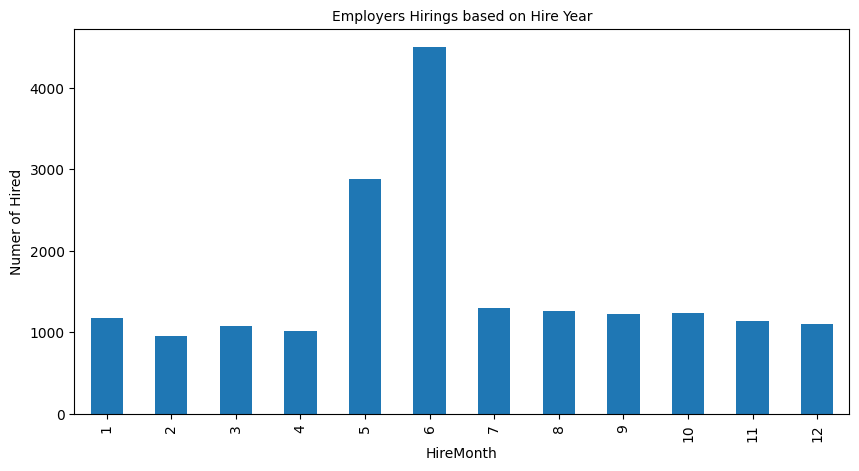

In [35]:
# Checking on which Month most people are hired

plt.figure(figsize=(10,5))
salary_copy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Numer of Hired')
plt.title("Employers Hirings based on Hire Year",fontsize=10)
plt.show()

-  More members are being hired in months of May and June but they have relatively lower average salaries

#### Lets check if there is any relation between any of the Numerical variables using _pairplot_

<Figure size 1500x2000 with 0 Axes>

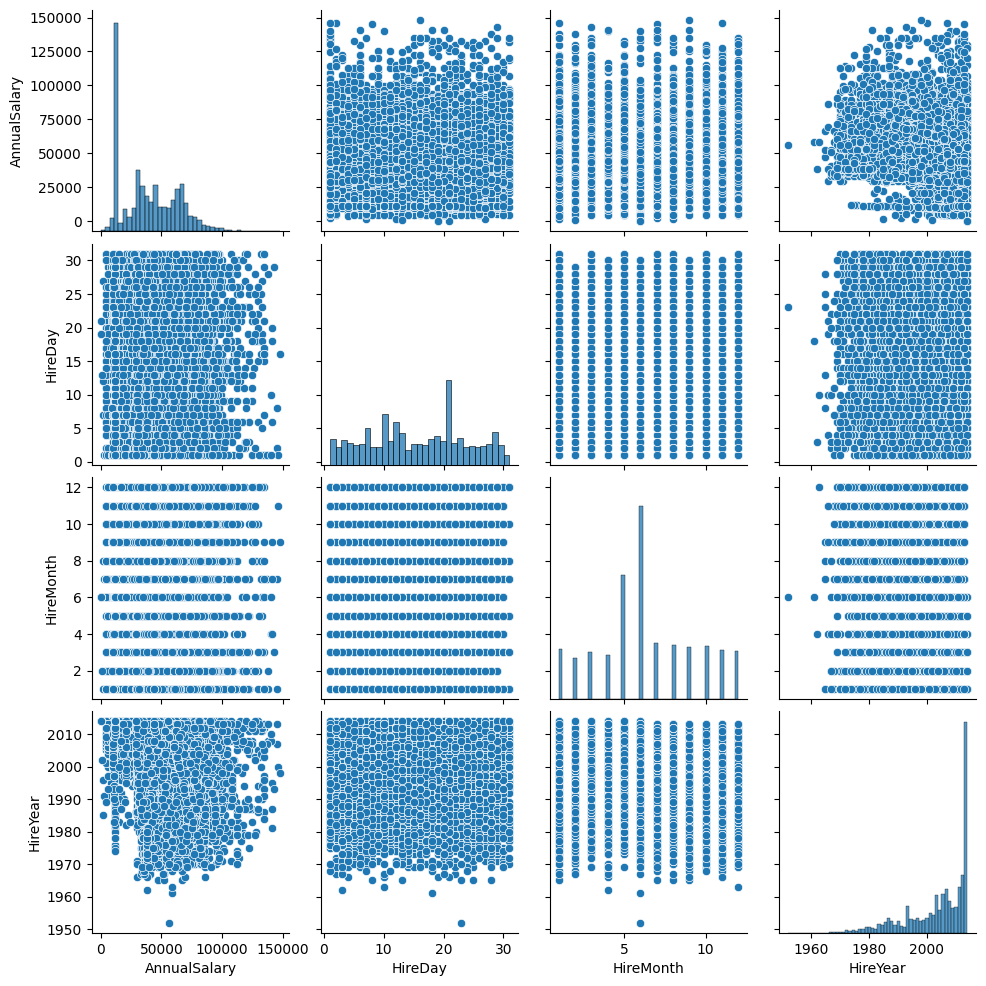

In [36]:
# Plot a pair plot

plt.figure(figsize=(15,20))
sns.pairplot(salary_copy)
plt.show()

Nothing seems to have any _correlation_. Lets visualize correlation coefficients using _heatmap_

<AxesSubplot: >

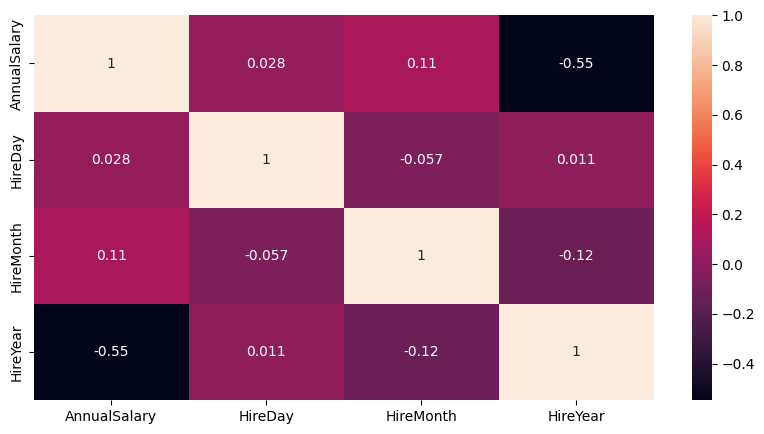

In [37]:
# Plot a heatMap

plt.figure(figsize=(10,5))
sns.heatmap(salary_copy.corr(),annot=True)

- Except for HireYear nothing seems to have significant correlation with Annual Salary

## <font face='italic'> Feature Engineering </font>

Let us create a copy of data frame to do model building

In [38]:
# Create a copy of data frame
salary_master = salary_copy.copy()

In [39]:
# Apply mean encoding for Job Title

mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)

print(salary_master['JobTitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [40]:
# Apply mean encoding for Agency

mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)

print(salary_master['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [41]:
# Apply mean encoding for AgencyID

mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)

print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


We have converted all the required categorical variables to Numerical variables. Lets check the info to check if trhere are any non-numeric variables

In [42]:
salary_master.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,11310.000000,11313.967200,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,44012.307229,61506.879579,07/24/2013,43999.0,24,7,2013


In [43]:
# Check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


 - Since we have HireYear, HireMonth and HireDay , we no longer require Date field
 - And Annual Income is never based on Name, so it is safe to remove both those columns

In [44]:
# Drop Name, HireDate column
salary_master = salary_master.drop(['HireDate','Name'],axis=1)

# Check Info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


#### Split data into train and test set using train_test_split

In [45]:
# Split data into train and test sets
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=44)

In [46]:
print('train data :',salary_train.shape)

print('test data:',salary_test.shape)

train data : (13226, 7)
test data: (5669, 7)


#### Seperate Dependent and Independent Variables using _pop_

In [47]:
# Divide tarin set into Dependent and independent variables
y_train = salary_train.pop('AnnualSalary')

X_train = salary_train


# Divide test set into Dependent and independent variables
y_test = salary_test.pop('AnnualSalary')

X_test = salary_test

## <font  face='italic'> Scaling</font>

#### Here we will be using  Standard Scaler, function of sklearn

In [48]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,2.025364e-16,1.128187e-17,-1.557972e-16,-9.885065e-17,-2.941344e-17,9.240924e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.545271e+00,-1.689931e+00,-1.402536e+00,-1.758026e+00,-1.821287e+00,-4.986760e+00
25%,-1.162772e+00,-1.271527e+00,-1.350975e+00,-8.070478e-01,-4.653621e-01,-5.768573e-01
50%,-1.463752e-01,8.495205e-02,1.418006e-01,2.505790e-02,-1.263811e-01,2.859497e-01
75%,8.607816e-01,8.960736e-01,1.046563e+00,7.382913e-01,5.515811e-01,8.611544e-01
max,4.158352e+00,3.123904e+00,2.240028e+00,1.808141e+00,1.907506e+00,9.570219e-01


In [49]:
# Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.010955,-0.008265,-0.007815,-0.009666,-0.003561,0.019520
std,0.997838,1.001727,1.009601,0.989574,0.998513,0.987308
min,-1.496333,-1.538825,-1.402536,-1.758026,-1.821287,-3.932218
25%,-1.162772,-1.271527,-1.350975,-0.807048,-0.465362,-0.480990
50%,-0.150509,0.085650,0.141801,0.025058,-0.126381,0.285950
75%,0.860782,0.905656,1.046563,0.738291,0.890562,0.861154
max,4.056300,4.633326,2.240028,1.808141,1.907506,0.957022


## <font  face='italic'> Model Building</font>


#### We are building a Linear Regression model

#### Generate a Linear Regression model by passing the X_train and y_train as inputs

In [50]:
# Build the model
lr = LinearRegression()

salary_reg = lr.fit(X_train,y_train)

- Let us check the R-squared

In [51]:
# Verify the r2 score
salary_reg.score(X_train,y_train)

0.9637275048624645

#### <font face='italic'> We got a very high value for R-squared which is very close to 1, which means the independent variables are able to expalin 96% of  variance in the dependent variable.</font>

## <font  face='italic'> Model Evaluation</font>

#### So lets check how model performs on test data

In [52]:
# r2 for test data
salary_reg.score(X_test,y_test)

0.966128108224257

#### <font  face='bold'> The model performs well on the test data as well giving an R-squared of 0.963, which indicates the model generated is a good model and can be used for predicting the Salaries of Employees in Baltimore</font>

#### Let's plot distribution plot to check whether Residuals satisfy assumptions of Linear Regression

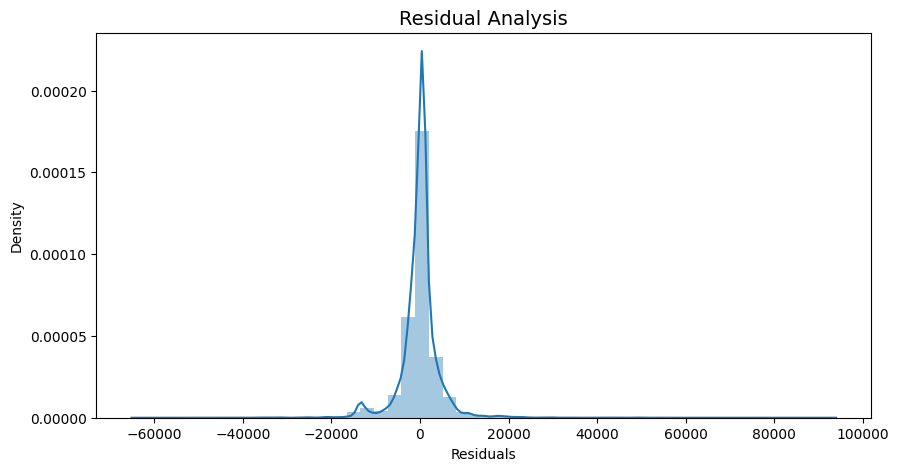

In [53]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=14)
plt.show()

- The Residual terms are normally distributed with mean at 0, which is one of the Assumption of Linear Regression

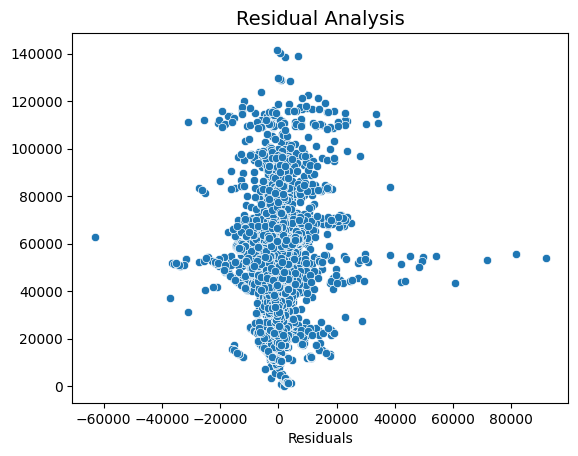

In [54]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis", fontsize=14)
plt.show()

- The Residuals are independent of each other ,which is another assumption in Linear Regression

#### The model has generated can be used for Salary prediction .Let us check the coefficients and intercept

In [55]:
# Print coef
print("Coef are:", salary_reg.coef_)

#print intercept
print("Intercept is", salary_reg.intercept_)

Coef are: [22322.71770613  2875.05386925 -1847.46569756   -33.76133458
  -138.82885167 -2130.63636   ]
Intercept is 39617.97238847726


#### Let us create a model equation and store it in a string

In [56]:
model = str(salary_reg.intercept_)

for i in range(len(salary_reg.coef_)):
    model = model +' + '  +(str(salary_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print(model)

39617.97238847726 + 22322.71770613249 * JobTitle + 2875.0538692521122 * AgencyID + -1847.4656975607113 * Agency + -33.76133457845377 * HireDay + -138.82885166516874 * HireMonth + -2130.636360004611 * HireYear


### <i><font  face='italic'>Observations from Model:</font></i>
 - Of all the features given  AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
 - Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.